In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read CSV files

In [2]:
weather_df = pd.read_csv("data/region/vietnam/weather.csv", header=[0, 1], index_col=0)
cities_df = pd.read_csv("data/region/vietnam/cities.csv")
air_df = pd.read_csv("data/region/vietnam/air_quality.csv", header=[0, 1], index_col=0)

In [3]:
weather_df.head(2)

Ho Chi Minh City, Vietnam                                    \
                            temperature_2m relative_humidity_2m dew_point_2m   
time                                                                           
2020-11-28T00:00                      25.4                 91.0         23.8   
2020-11-28T01:00                      24.8                 92.0         23.5   

                                                                            \
                 precipitation surface_pressure cloud_cover wind_speed_10m   
time                                                                         
2020-11-28T00:00           0.0           1010.3        74.0            8.1   
2020-11-28T01:00           0.0           1009.8        50.0            5.5   

                                    Hanoi, Vietnam                       ...  \
                 wind_direction_10m temperature_2m relative_humidity_2m  ...   
time                                                                     ...   
2020-11-28T00:00              291.0           17.9                 73.0  ...   
2020-11-28T01:00              349.0           17.7                 73.0  ...   

                 Kon Tum, Vietnam                    Đà Nẵng, Vietnam  \
                   wind_speed_10m wind_direction_10m   temperature_2m   
time                                                                    
2020-11-28T00:00              5.1               51.0             24.0   
2020-11-28T01:00              4.5               61.0             23.8   

                                                                  \
                 relative_humidity_2m dew_point_2m precipitation   
time                                                               
2020-11-28T00:00                 86.0         21.5           0.9   
2020-11-28T01:00                 85.0         21.1           1.1   

                                                              \
                 surface_pressure cloud_cover wind_speed_10m   
time                                                           
2020-11-28T00:00           1016.8       100.0           22.6   
2020-11-28T01:00           1016.4       100.0           25.1   

                                     
                 wind_direction_10m  
time                                 
2020-11-28T00:00               34.0  
2020-11-28T01:00               27.0  

[2 rows x 504 columns]

### Multi-level index to Normal index

In [4]:
weather_df = weather_df.stack(level=0).reset_index()
weather_df.rename(columns={'level_1': 'location'}, inplace=True)

air_df = air_df.stack(level=0).reset_index()
air_df.rename(columns={'level_1': 'location'}, inplace=True)

C:\Users\KHAI\AppData\Local\Temp\ipykernel_21024\4052551259.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  weather_df = weather_df.stack(level=0).reset_index()
C:\Users\KHAI\AppData\Local\Temp\ipykernel_21024\4052551259.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  air_df = air_df.stack(level=0).reset_index()


In [5]:
weather_df.head(2)

,time,location,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m
0,2020-11-28T00:00,"Biên Hòa, Vietnam",25.5,96.0,24.8,0.0,1010.8,41.0,5.5,11.0
1,2020-11-28T00:00,"Buôn Ma Thuột, Vietnam",20.6,87.0,18.4,0.0,961.3,92.0,4.3,42.0


In [6]:
cities_df.head(2)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Ho Chi Minh City,Ho Chi Minh City,10.7756,106.7019,Vietnam,VN,VNM,Hồ Chí Minh,admin,15136000.0,1704774326
1,Hanoi,Hanoi,21.0000,105.8500,Vietnam,VN,VNM,Hà Nội,primary,8246600.0,1704413791


In [7]:
air_df.head(2)

,time,location,co,no2,o3,so2,pm2_5,pm10,aqi
0,2020-11-28 00:00:00,"Biên Hòa, Vietnam",363.83,6.51,33.26,3.76,8.60,12.78,1.0
1,2020-11-28 00:00:00,"Buôn Ma Thuột, Vietnam",410.56,6.00,47.21,2.44,16.49,19.68,2.0


### Get province from location

In [8]:
weather_df[['province', 'country']] = weather_df['location'].str.split(',', expand=True)
weather_df = weather_df.drop(columns=['location'])

air_df[['province', 'country']] = air_df['location'].str.split(',', expand=True)
air_df = air_df.drop(columns=['location'])

In [9]:
air_df.head(2)

,time,co,no2,o3,so2,pm2_5,pm10,aqi,province,country
0,2020-11-28 00:00:00,363.83,6.51,33.26,3.76,8.60,12.78,1.0,Biên Hòa,Vietnam
1,2020-11-28 00:00:00,410.56,6.00,47.21,2.44,16.49,19.68,2.0,Buôn Ma Thuột,Vietnam


### Use cities_df to get correct province name for both weather and air data

In [10]:
weather_df = weather_df.merge(cities_df[['city', 'admin_name']], right_on='city', left_on='province', how='left')
weather_df.drop(columns=['country', 'city', 'province'], inplace=True)
weather_df.rename(columns={'admin_name': 'province'}, inplace=True)

air_df = air_df.merge(cities_df[['city', 'admin_name']], right_on='city', left_on='province', how='left')
air_df.drop(columns=['country', 'city', 'province'], inplace=True)
air_df.rename(columns={'admin_name': 'province'}, inplace=True)

Set datetime types

In [11]:
# Set datetime dtypes
weather_df['time'] = weather_df['time'].astype('datetime64[s]')
air_df['time'] = air_df['time'].astype('datetime64[s]')

In [12]:
weather_df.head(2)

,time,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,province
0,2020-11-28,25.5,96.0,24.8,0.0,1010.8,41.0,5.5,11.0,Đồng Nai
1,2020-11-28,20.6,87.0,18.4,0.0,961.3,92.0,4.3,42.0,Đắk Lắk


### Check null values

In [13]:
print(air_df.isnull().values.any())
print(weather_df.isnull().values.any())

False
False


### Check negative values

Get attributes only (exclude time and province)

In [14]:
air_df_attr = air_df.iloc[:,1:-1]
weather_df_attr = weather_df.iloc[:,1:-1]

In [15]:
print((air_df_attr.values < 0).any())
print((weather_df_attr.values < 0).any())

True
True


In [16]:
neg_air_count = (air_df_attr.values < 0).sum()
neg_weather_count = (weather_df_attr.values < 0).sum()

print(neg_air_count)
print(neg_weather_count)

252
3532


In [17]:
removed_neg_air = air_df.loc[air_df_attr[air_df_attr >= 0].dropna().index]
removed_neg_weather = weather_df.loc[weather_df_attr[weather_df_attr >= 0].dropna().index]

print(1 - removed_neg_air.shape[0]/air_df_attr.shape[0])
print(1 - removed_neg_weather.shape[0]/weather_df_attr.shape[0])

0.0001166041538841478
0.001612891441263753


0.01% and 0.1% of rows containing negative values for air and weather data respectively

In [18]:
air_df = removed_neg_air
weather_df = removed_neg_weather

In [19]:
print((air_df.iloc[:,1:-1].values < 0).sum())
print((weather_df.iloc[:,1:-1].values < 0).sum())

0
0


### Check missing provinces, timestamps

Set time as index

In [20]:
weather_df.set_index(weather_df.columns[0], inplace=True)
air_df.set_index(air_df.columns[0], inplace=True)

Match timestamps for air data and weather data

In [21]:
print(air_df.index.min(), weather_df.index.min())
print(air_df.index.max(), weather_df.index.max())

2020-11-27 17:00:00 2020-11-28 00:00:00
2024-11-16 11:00:00 2024-11-15 07:00:00


In [22]:
starting_timepstamp = max(air_df.index.min(), weather_df.index.min())
ending_timepstamp = min(air_df.index.max(), weather_df.index.max())

air_df = air_df[starting_timepstamp:ending_timepstamp]
weather_df = weather_df[starting_timepstamp:ending_timepstamp]

Timestamps with missing provinces

In [23]:
air_date_counts = air_df.index.value_counts()
weather_date_counts = weather_df.index.value_counts()

print(air_date_counts.value_counts())
print(weather_date_counts.value_counts())

count
63    34143
61      109
58       17
56        7
2         4
Name: count, dtype: int64
count
63    34180
62      180
61       67
60       47
59       37
58       29
55       22
56       20
57       16
51       16
49       15
48       14
53       14
47       14
46       13
54       13
44       12
45       12
43       11
52       10
50        9
42        7
41        2
Name: count, dtype: int64


Air data

<Axes: title={'center': 'Number of provinces available per hour in air data'}, xlabel='time'>

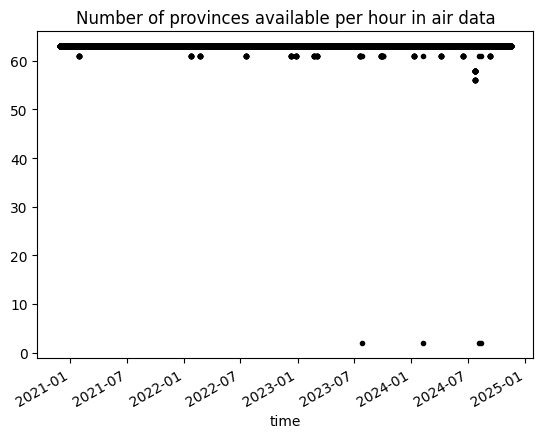

In [24]:
air_date_counts.plot(style='k.', title='Number of provinces available per hour in air data')

Missing provinces for 8035 hourly timestamps (0.3%)

In [25]:
missing_provinces_air = air_df.loc[air_date_counts[air_date_counts < 63].index]
print(missing_provinces_air.shape[0])
print(missing_provinces_air.shape[0]/air_df.shape[0])

8035
0.0037215545398796876


Drop hourly timestamp with missing provinces

In [26]:
dropped_air_df = air_df.loc[air_date_counts[air_date_counts == 63].index].sort_index()

<Axes: title={'center': 'Number of provinces available per hour in air data'}, xlabel='time'>

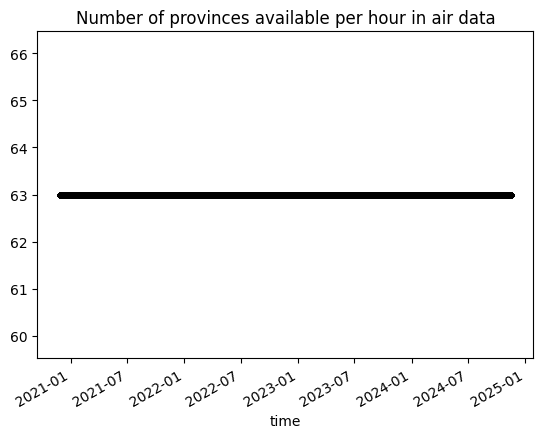

In [27]:
dropped_air_df.index.value_counts().plot(style='k.', title='Number of provinces available per hour in air data')

Weather data

<Axes: title={'center': 'Number of provinces available per hour in weather data'}, xlabel='time'>

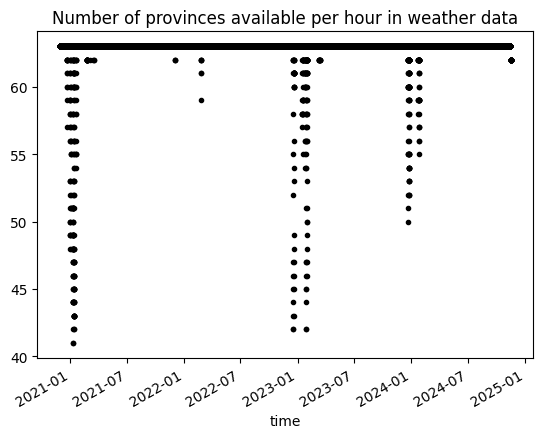

In [28]:
weather_date_counts.plot(style='k.', title='Number of provinces available per hour in weather data')

Missing provinces for 32984 hourly timestamps (1.5%)

In [29]:
missing_provinces_weather = weather_df.loc[weather_date_counts[weather_date_counts < 63].index]
print(missing_provinces_weather.shape[0])
print(missing_provinces_weather.shape[0]/weather_df.shape[0])

32984
0.015086510508049128


Drop hourly timestamps with missing provinces

In [30]:
dropped_weather_df = weather_df.loc[weather_date_counts[weather_date_counts == 63].index].sort_index()

<Axes: title={'center': 'Number of provinces available per hour in weather data'}, xlabel='time'>

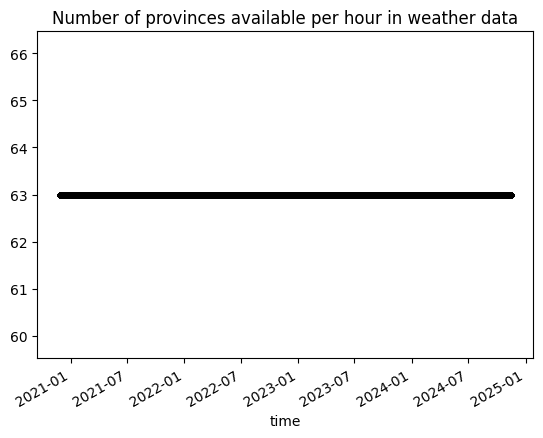

In [31]:
dropped_weather_df.index.value_counts().plot(style='k.', title='Number of provinces available per hour in weather data')


Missing 617 and 580 timestamps for air data and weather data respectively

In [32]:
full_date_range = pd.date_range(start=starting_timepstamp, end=ending_timepstamp, freq='h')

missing_dates_air = full_date_range.difference(dropped_air_df.index)
missing_dates_air.shape

(617,)

In [33]:
missing_dates_weather = full_date_range.difference(dropped_weather_df.index)
missing_dates_weather.shape

(580,)

Plot missing hourly timestamps for both data

In [34]:
missing_overlap = missing_dates_weather.intersection(missing_dates_air)
missing_air_only = missing_dates_air.difference(missing_overlap)
missing_weather_only = missing_dates_weather.difference(missing_overlap)

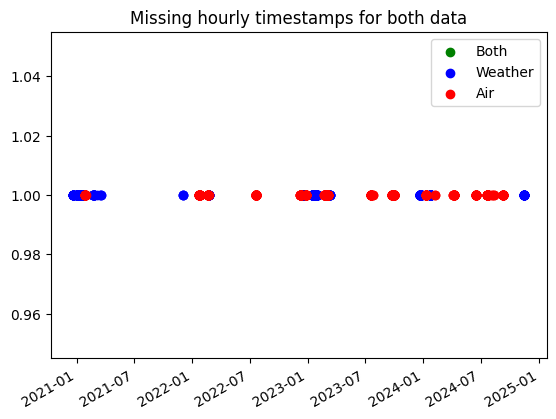

In [35]:
fig, ax = plt.subplots()
ax.scatter(missing_overlap, [1] * len(missing_overlap), color="green", label="Both")
ax.scatter(missing_weather_only, [1] * len(missing_weather_only), color="blue", label="Weather")
ax.scatter(missing_air_only, [1] * len(missing_air_only), color="red", label="Air")

fig.autofmt_xdate()
plt.title('Missing hourly timestamps for both data')
ax.legend()
plt.show()

Missing 1197 timestamps in total if dropped (3.4%)

In [36]:
missing_union = missing_dates_weather.union(missing_dates_air)
print(missing_union.shape[0])
print(missing_union.shape[0]/full_date_range.shape[0])

1197
0.0344361334867664


Match available timestamps for both air and weather data

For dropped dataframes

In [37]:
dropped_air_df.drop(missing_weather_only, inplace=True)
dropped_weather_df.drop(missing_air_only, inplace=True)

For regulara dataframes

Match index (time, province) for both air and weather data

In [38]:
multi_idx_air = air_df.reset_index().set_index(['time', 'province'])
multi_idx_weather = weather_df.reset_index().set_index(['time', 'province'])

In [39]:
intersect_index = multi_idx_air.index.intersection(multi_idx_weather.index)

multi_idx_air = multi_idx_air.loc[intersect_index]
multi_idx_weather = multi_idx_weather.loc[intersect_index]

In [43]:
weather_df = multi_idx_weather
air_df = multi_idx_air

### Interpolation

In [48]:
import numpy as np

Creating artificial random gaps from longest consecutive timestamps (to calculate losses for different interpolation methods)

Identify the start of each sequence of consecutive timestamps (True if the start of sequence)

In [103]:
start_of_consec_seq = air_df.index.drop_duplicates().to_series().diff() != pd.Timedelta('0 days 01:00:00')
start_of_consec_seq.head(5)

time
2020-11-28 00:00:00     True
2020-11-28 01:00:00    False
2020-11-28 02:00:00    False
2020-11-28 03:00:00    False
2020-11-28 04:00:00    False
Name: time, dtype: bool

Counter/identifer for each sequence

In [104]:
consec_seq_id = start_of_consec_seq.cumsum().to_frame(name='group')
consec_seq_id

,group
time,
2020-11-28 00:00:00,1
2020-11-28 01:00:00,1
2020-11-28 02:00:00,1
2020-11-28 03:00:00,1
2020-11-28 04:00:00,1
...,...
2024-11-15 03:00:00,17
2024-11-15 04:00:00,17
2024-11-15 05:00:00,17


Group id with their group length

In [105]:
grouped = consec_seq_id.groupby('group').size()
grouped

group
1     1448
2     8640
3      648
4     3576
5     3360
6      336
7     1416
8      168
9     3264
10    1584
11     120
12    2376
13    2088
14    1680
15     864
16    1128
17    1584
dtype: int64

Select group with the longest consecutive timestamps

In [106]:
longest_sequence = consec_seq_id[consec_seq_id['group'] == grouped.idxmax()].index
longest_sequence

DatetimeIndex(['2021-01-28 08:00:00', '2021-01-28 09:00:00',
               '2021-01-28 10:00:00', '2021-01-28 11:00:00',
               '2021-01-28 12:00:00', '2021-01-28 13:00:00',
               '2021-01-28 14:00:00', '2021-01-28 15:00:00',
               '2021-01-28 16:00:00', '2021-01-28 17:00:00',
               ...
               '2022-01-22 22:00:00', '2022-01-22 23:00:00',
               '2022-01-23 00:00:00', '2022-01-23 01:00:00',
               '2022-01-23 02:00:00', '2022-01-23 03:00:00',
               '2022-01-23 04:00:00', '2022-01-23 05:00:00',
               '2022-01-23 06:00:00', '2022-01-23 07:00:00'],
              dtype='datetime64[s]', name='time', length=8640, freq=None)

Randomly drop 5% of timestamps (rows) from the longest sequence

In [107]:
full_seq_air = air_df.loc[longest_sequence].reset_index().set_index(['time', 'province'])
full_seq_weather = weather_df.loc[longest_sequence].reset_index().set_index(['time', 'province'])

In [108]:
n_drop = int(len(full_seq_air.index) * 0.05)
np.random.seed(24)
drop_indices = np.random.choice(full_seq_air.index, size=n_drop, replace=False)
drop_indices.shape

(27214,)

In [109]:
missing_seq_air = full_seq_air.drop(index=drop_indices)
missing_seq_weather = full_seq_weather.drop(index=drop_indices)

Re-index missing timestamps for interpolation

In [110]:
missing_seq_air = missing_seq_air.reindex(full_seq_air.index)
missing_seq_weather = missing_seq_weather.reindex(full_seq_weather.index)

Unstack for interpolation

In [111]:
missing_seq_air_unstacked = missing_seq_air.unstack(level='province', fill_value=np.nan)
missing_seq_weather_unstacked = missing_seq_weather.unstack(level='province', fill_value=np.nan)

In [ ]:
linear_interpolated_air_unstacked = missing_seq_air_unstacked.interpolate(
    method='linear', axis=0, limit=None, limit_direction='both')
time_interpolated_air_unstacked = missing_seq_air_unstacked.interpolate(
    method='time', axis=0, limit=None, limit_direction='both')
spline2_interpolated_air_unstacked = missing_seq_air_unstacked.interpolate(
    method='spline', axis=0, limit=None, limit_direction='both', order=2)
spline3_interpolated_air_unstacked = missing_seq_air_unstacked.interpolate(
    method='spline', axis=0, limit=None, limit_direction='both', order=3)

linear_interpolated_weather_unstacked = missing_seq_weather_unstacked.interpolate(
    method='linear', axis=0, limit=None, limit_direction='both')
time_interpolated_weather_unstacked = missing_seq_weather_unstacked.interpolate(
    method='time', axis=0, limit=None, limit_direction='both')
spline2_interpolated_weather_unstacked = missing_seq_weather_unstacked.interpolate(
    method='spline', axis=0, limit=None, limit_direction='both', order=2)
spline3_interpolated_weather_unstacked = missing_seq_weather_unstacked.interpolate(
    method='spline', axis=0, limit=None, limit_direction='both', order=3)

C:\Users\KHAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\missing.py:604: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  terp = interpolate.UnivariateSpline(x, y, k=order, **kwargs)
C:\Users\KHAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\missing.py:604: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  t

In [ ]:
linear_interpolated_air = linear_interpolated_air_unstacked.stack(level='province', future_stack=True).sort_index()
time_interpolated_air = time_interpolated_air_unstacked.stack(level='province', future_stack=True).sort_index()
spline2_interpolated_air = spline2_interpolated_air_unstacked.stack(level='province', future_stack=True).sort_index()
spline3_interpolated_air = spline3_interpolated_air_unstacked.stack(level='province', future_stack=True).sort_index()

linear_interpolated_weather = linear_interpolated_weather_unstacked.stack(level='province', future_stack=True).sort_index()
time_interpolated_weather = time_interpolated_weather_unstacked.stack(level='province', future_stack=True).sort_index()
spline2_interpolated_weather = spline2_interpolated_weather_unstacked.stack(level='province', future_stack=True).sort_index()
spline3_interpolated_weather = spline3_interpolated_weather_unstacked.stack(level='province', future_stack=True).sort_index()


In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [149]:
def calculate_loss(original, interpolated):
    mae = mean_absolute_error(original, interpolated)
    mse = mean_squared_error(original, interpolated)
    rmse = np.sqrt(mse)
    return mae, rmse

def calculate_loss_all_columns(original_df, interpolated_df, interpolated_indices):
    loss_dict = {}
    for column in original_df.columns:
        original_values = original_df.loc[interpolated_indices, column]
        interpolated_values = interpolated_df.loc[interpolated_indices, column]
        mae, rmse = calculate_loss(original_values, interpolated_values)
        loss_dict[column] = {'MAE': mae, 'RMSE': rmse}
    return loss_dict

Loss between interpolated and real values

Air

In [159]:
calculate_loss_all_columns(full_seq_air, linear_interpolated_air, drop_indices)

{'co': {'MAE': 24.60795458220034, 'RMSE': 74.89989785402479},
 'no2': {'MAE': 0.7113713897258764, 'RMSE': 1.6257028264613926},
 'o3': {'MAE': 2.17816013816418, 'RMSE': 4.414239730852825},
 'so2': {'MAE': 0.4179255530241787, 'RMSE': 1.1391409164680169},
 'pm2_5': {'MAE': 1.5205583278214643, 'RMSE': 4.345654809207598},
 'pm10': {'MAE': 1.8115156904534433, 'RMSE': 5.115373558918573},
 'aqi': {'MAE': 0.12597070135469488, 'RMSE': 0.27123353146294393}}

In [160]:
calculate_loss_all_columns(full_seq_air, time_interpolated_air, drop_indices)

{'co': {'MAE': 24.60795458220034, 'RMSE': 74.89989785402479},
 'no2': {'MAE': 0.7113713897258764, 'RMSE': 1.6257028264613926},
 'o3': {'MAE': 2.17816013816418, 'RMSE': 4.414239730852825},
 'so2': {'MAE': 0.4179255530241787, 'RMSE': 1.1391409164680169},
 'pm2_5': {'MAE': 1.5205583278214643, 'RMSE': 4.345654809207598},
 'pm10': {'MAE': 1.8115156904534433, 'RMSE': 5.115373558918573},
 'aqi': {'MAE': 0.12597070135469488, 'RMSE': 0.27123353146294393}}

In [161]:
calculate_loss_all_columns(full_seq_air, spline2_interpolated_air, drop_indices)

{'co': {'MAE': 48.07628649257739, 'RMSE': 150.86960627182728},
 'no2': {'MAE': 1.172702366048232, 'RMSE': 1.8918180724177542},
 'o3': {'MAE': 2.3125759045032637, 'RMSE': 4.793513726799437},
 'so2': {'MAE': 0.9341643252350874, 'RMSE': 1.5398606595151962},
 'pm2_5': {'MAE': 2.0608566989915493, 'RMSE': 6.307293638248124},
 'pm10': {'MAE': 2.5406484098608324, 'RMSE': 8.194903723344037},
 'aqi': {'MAE': 0.7679377300672452, 'RMSE': 0.9806247371258064}}

In [162]:
calculate_loss_all_columns(full_seq_air, spline3_interpolated_air, drop_indices)

{'co': {'MAE': 19.186202987229183, 'RMSE': 70.63984001849761},
 'no2': {'MAE': 1.161412676224449, 'RMSE': 1.782602125019188},
 'o3': {'MAE': 2.0368268742016924, 'RMSE': 3.727474009613031},
 'so2': {'MAE': 0.9324953298014953, 'RMSE': 1.4813120511227722},
 'pm2_5': {'MAE': 1.7393303978216117, 'RMSE': 4.278656476913925},
 'pm10': {'MAE': 1.9437324812041274, 'RMSE': 4.982462009157813},
 'aqi': {'MAE': 0.766593062482447, 'RMSE': 0.9796563399770642}}

Weather

In [164]:
calculate_loss_all_columns(full_seq_weather, linear_interpolated_weather, drop_indices)

{'temperature_2m': {'MAE': 0.2578331006099802, 'RMSE': 0.3998082303057636},
 'relative_humidity_2m': {'MAE': 1.5024190980132772,
  'RMSE': 2.2952773644721907},
 'dew_point_2m': {'MAE': 0.1993796085348228, 'RMSE': 0.3269288027135562},
 'precipitation': {'MAE': 0.19033340682491856, 'RMSE': 0.6905404430712083},
 'surface_pressure': {'MAE': 0.19074802185149906, 'RMSE': 0.24105043966424783},
 'cloud_cover': {'MAE': 7.893693197128929, 'RMSE': 13.95680809211293},
 'wind_speed_10m': {'MAE': 1.0228038264618702, 'RMSE': 1.49388982744668},
 'wind_direction_10m': {'MAE': 22.849211190318705, 'RMSE': 54.697612572708735}}

In [165]:
calculate_loss_all_columns(full_seq_weather, time_interpolated_weather, drop_indices)

{'temperature_2m': {'MAE': 0.2578331006099802, 'RMSE': 0.3998082303057636},
 'relative_humidity_2m': {'MAE': 1.5024190980132772,
  'RMSE': 2.2952773644721907},
 'dew_point_2m': {'MAE': 0.1993796085348228, 'RMSE': 0.3269288027135562},
 'precipitation': {'MAE': 0.19033340682491856, 'RMSE': 0.6905404430712083},
 'surface_pressure': {'MAE': 0.19074802185149914, 'RMSE': 0.24105043966424783},
 'cloud_cover': {'MAE': 7.893693197128929, 'RMSE': 13.95680809211293},
 'wind_speed_10m': {'MAE': 1.0228038264618702, 'RMSE': 1.49388982744668},
 'wind_direction_10m': {'MAE': 22.849211190318705, 'RMSE': 54.697612572708735}}

In [166]:
calculate_loss_all_columns(full_seq_weather, spline2_interpolated_weather, drop_indices)


{'temperature_2m': {'MAE': 0.8976344224554479, 'RMSE': 1.134867378904212},
 'relative_humidity_2m': {'MAE': 1.7663103690165174,
  'RMSE': 2.7295747010151046},
 'dew_point_2m': {'MAE': 0.7668043794388363, 'RMSE': 1.0249277952407074},
 'precipitation': {'MAE': 0.35750972526781705, 'RMSE': 0.8757925991497907},
 'surface_pressure': {'MAE': 0.9994517162239129, 'RMSE': 1.152685512638532},
 'cloud_cover': {'MAE': 40.85169141188619, 'RMSE': 66.1766383146573},
 'wind_speed_10m': {'MAE': 1.2572853427552366, 'RMSE': 1.7553189422556266},
 'wind_direction_10m': {'MAE': 66.07569722072651, 'RMSE': 239.99467300799327}}

In [167]:
calculate_loss_all_columns(full_seq_weather, spline3_interpolated_weather, drop_indices)

{'temperature_2m': {'MAE': 0.9129525052965349, 'RMSE': 1.1503670069088132},
 'relative_humidity_2m': {'MAE': 1.700669976417934, 'RMSE': 2.485264726636866},
 'dew_point_2m': {'MAE': 0.7645779132918538, 'RMSE': 1.0239876100610754},
 'precipitation': {'MAE': 0.35529843760511687, 'RMSE': 0.872379404375591},
 'surface_pressure': {'MAE': 1.0163061332630763, 'RMSE': 1.1679617096823802},
 'cloud_cover': {'MAE': 9.28892535915332, 'RMSE': 15.747324055814486},
 'wind_speed_10m': {'MAE': 1.2562746363958066, 'RMSE': 1.7369449704932614},
 'wind_direction_10m': {'MAE': 34.812710847188136, 'RMSE': 923.4803857810217}}

Choose time interpolation for filling missing values

Get full (time, province) index, use dropped_air_df to ensure no missing provinces

In [44]:
full_provinces = dropped_air_df.reset_index().set_index(['time', 'province']).index[:63].get_level_values(1)
full_multi_index = pd.MultiIndex.from_product([full_date_range, full_provinces], names=["time", "province"])

In [54]:
interpolated_air_df = air_df.reindex(full_multi_index)
interpolated_weather_df = weather_df.reindex(full_multi_index)

Unstack for interpolation

In [55]:
interpolated_air_df = interpolated_air_df.unstack(level='province', fill_value=np.nan)
interpolated_weather_df = interpolated_weather_df.unstack(level='province', fill_value=np.nan)


In [56]:
interpolated_air_df.interpolate(method='time', axis=0, limit=None, limit_direction='both', inplace=True)
interpolated_weather_df.interpolate(method='time', axis=0, limit=None, limit_direction='both', inplace=True)


Stack after interpolation

In [57]:
interpolated_air_df = interpolated_air_df.stack(level='province', future_stack=True).sort_index()
interpolated_weather_df = interpolated_weather_df.stack(level='province', future_stack=True).sort_index()


In [58]:
print(interpolated_air_df.isna().any())
print(interpolated_weather_df.isna().any())


co       False
no2      False
o3       False
so2      False
pm2_5    False
pm10     False
aqi      False
dtype: bool
temperature_2m          False
relative_humidity_2m    False
dew_point_2m            False
precipitation           False
surface_pressure        False
cloud_cover             False
wind_speed_10m          False
wind_direction_10m      False
dtype: bool


Set multi-index for dropped dataframes

In [63]:
dropped_air_df = dropped_air_df.reset_index().set_index(['time', 'province'])
dropped_weather_df = dropped_weather_df.reset_index().set_index(['time', 'province'])

In [65]:
air_df.sort_index().to_csv("data/region/vietnam/cleaned_air.csv")
weather_df.sort_index().to_csv("data/region/vietnam/cleaned_weather.csv")

dropped_air_df.sort_index().to_csv("data/region/vietnam/dropped_air.csv")
dropped_weather_df.sort_index().to_csv("data/region/vietnam/dropped_weather.csv")

interpolated_air_df.sort_index().to_csv("data/region/vietnam/interpolated_air.csv")
interpolated_weather_df.sort_index().to_csv("data/region/vietnam/interpolated_weather.csv")
